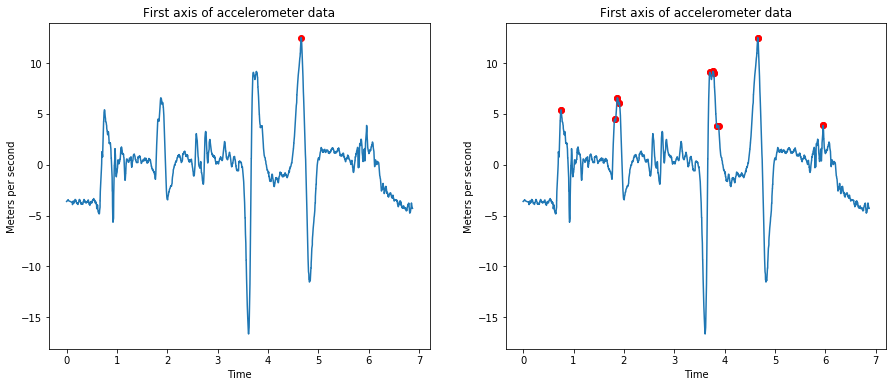

In [4]:
import numpy as np
import matplotlib.pyplot as plt  
import os
thres = 3.5

def peak_detection1(t, sig):
    peaks = []
    max_val = -np.Inf   #負無限大
    N = len(sig)
    for i in range(0,N):
        if sig[i] > max_val:
            max_val = sig[i]
            position = t[i]

    peaks.append((position, max_val))
    return np.array(peaks)


def peak_detection2(t, sig):
    peaks = []
    max_val = -np.Inf  # 負無限大
    N = len(sig)
    for i in range(2, N):
        if sig[i]>thres and sig[i]>sig[i+2] and sig[i]>sig[i-2]:
            position = t[i]
            peaks.append((position, sig[i]))

    return np.array(peaks)

csv_filname = 'sample_sensor_data.csv'
data = np.genfromtxt(csv_filname, delimiter = ',').T
timestamps = (data[0] - data[0,0])/1000

accel_data = data[1:4]
gyro_data = data[4:-1]


max_peaks = peak_detection1(timestamps, accel_data[0])
max_peaks2 = peak_detection2(timestamps, accel_data[0])
plt.figure(figsize = (15,6))
plt.subplot(121)
plt.scatter(max_peaks[:, 0], max_peaks[:, 1], color='red')
plt.plot(timestamps, accel_data[0])
plt.title('First axis of accelerometer data')
plt.xlabel("Time")
plt.ylabel("Meters per second")

plt.subplot(122)
plt.scatter(max_peaks2[:, 0], max_peaks2[:, 1], color='red')
plt.plot(timestamps, accel_data[0])
plt.title('First axis of accelerometer data')
plt.xlabel("Time")
plt.ylabel("Meters per second")
plt.show()